### Proyecto No.255
- Diego Cordóva 2032552
- Paola De León 2036255
- Gabriela Contreras 2022553

In [12]:
import os
import json
import skimage
import numpy as np 
from math import sqrt
import matplotlib.pyplot as plt
from skimage.draw import ellipse
from skimage import morphology as mo
from skimage import io, morphology, color
from skimage.morphology import medial_axis, skeletonize
from skimage.measure import find_contours, approximate_polygon, subdivide_polygon
from skimage.feature import corner_peaks, corner_fast, corner_harris, corner_shi_tomasi

##### PARTE NO. 2
------

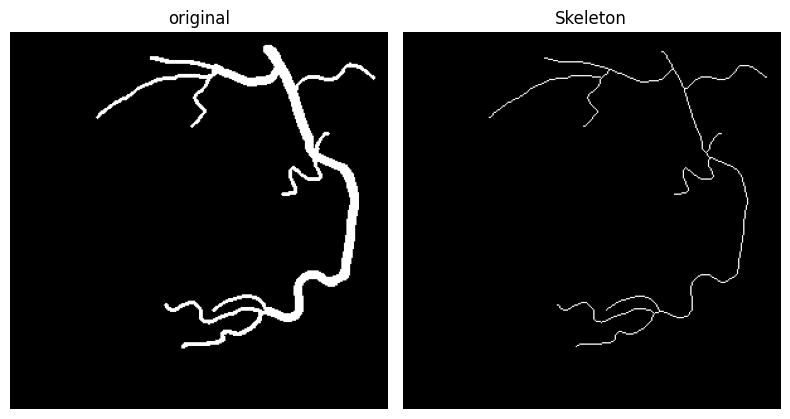

In [13]:
def read_img(filepath):
    data = open(filepath, 'rb')
    img = plt.imread(data)
    return img

def create_skeleton(img):
    T = mo.thin(img)
    skeleton_lee = skeletonize(T, method='lee')
    return skeleton_lee

# ejemplo de uso
img = read_img('./database/7_gt.pgm')
skel = create_skeleton(img)

fig, axes = plt.subplots(1, 2, figsize=(8, 8), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(img, cmap='gray')
ax[0].set_title('original')
ax[0].axis('off')

ax[1].imshow(skel, cmap='gray')
ax[1].set_title('Skeleton')
ax[1].axis('off')

fig.tight_layout()
plt.show()

In [14]:
def draw_nodes(og_img, coords: list[dict[list, str]]):
    fig, ax = plt.subplots()
    ax.imshow(og_img, cmap=plt.cm.gray)
    contours = find_contours(og_img, level=0.1) 

    # plt.imshow(skel, cmap='gray')

    for contour in contours:
        plt.plot(contour[:, 1], contour[:, 0], linewidth=1, color='yellow')

    for cor in coords:
        actual_coords = cor['coords']
        if len(actual_coords) == 0: continue
        actual_color = cor['color']
        ax.plot(actual_coords[:, 1], actual_coords[:, 0], color=actual_color, marker='o', linestyle='None', markersize=4)


    ax.axis('off')
    plt.show()

In [148]:
def euclidean_d(p1, p2):
    return sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

def getRotations(arr: list[np.ndarray]) -> list[np.ndarray]:
    rotations = []
    for a in arr:
        rot1 = np.rot90(a)
        rot2 = np.rot90(rot1)
        rot3 = np.rot90(rot2)
        rot4 = np.rot90(rot3)
        rotations = rotations + [rot4, rot1, rot2, rot3]

    return rotations

def arr_in_pool(arr, pool):
    for p in pool:
        if np.array_equal(arr, p):
            return True
        
    return False

b_pool_4 = getRotations([
    np.array([
        [255, 255, 255],
        [ 0 , 255,  0 ],
        [ 0 , 255,  0 ],
    ]),
    np.array([
        [255,  0 , 255],
        [ 0 , 255,  0 ],
        [ 0 , 255,  0 ],
    ]),
    np.array([
        [ 0 ,  0 , 255],
        [255, 255,  0 ],
        [ 0 , 255,  0 ],
    ]),
    np.array([
        [ 0 , 255,  0 ],
        [255, 255, 255],
        [ 0 ,  0 , 255],
    ]),
    np.array([
        [ 0 , 255,  0 ],
        [255, 255, 255],
        [255,  0 ,  0 ],
    ]),
    np.array([
        [255,  0 , 255],
        [ 0 , 255,  0 ],
        [ 0 ,  0 , 255],
    ]),
])

b_pool_5 = getRotations([
    np.array([
        [ 0 , 255,  0 ],
        [255, 255, 255],
        [ 0 ,  0 , 255],
    ]),

    np.array([
        [ 0 , 255,  0 ],
        [255, 255, 255],
        [255,  0 ,  0 ],
    ]),
])

t_pool_3x3 = getRotations([
    np.array([
        [ 0 , 255,  0 ],
        [255, 255, 255],
        [ 0 , 255,  0 ],
    ]),

    np.array([
        [255,  0 , 255],
        [ 0 , 255,  0 ],
        [255,  0 , 255],
    ]),

    np.array([
        [ 0 , 255,  0 ],
        [255,  0 , 255],
        [ 0 , 255,  0 ],
    ]),
])

t_pool_4x4 = getRotations([
    np.array([
        [ 0 , 255,  0 ,  0 ],
        [255, 255,  0 ,  0 ],
        [ 0 ,  0 , 255, 255],
        [ 0 ,  0 , 255,  0 ],
    ]),
    np.array([
        [ 0 , 255,  0 ,  0 ],
        [255, 255,  0 ,  0 ],
        [ 0 ,  0 , 255, 255],
        [ 0 , 255,  0 ,  0 ],
    ]),
    np.array([
        [ 0 , 255,  0 ,  0 ],
        [255, 255,  0 , 255],
        [ 0 ,  0 , 255,  0 ],
        [ 0 ,  0 , 255,  0 ],
    ]),
    np.array([
        [ 0 ,  0 , 255,  0 ],
        [255, 255,  0 ,  0 ],
        [ 0 ,  0 , 255, 255],
        [ 0 ,  0 , 255,  0 ],
    ]),
    np.array([
        [ 0 , 255,  0 ,  0 ],
        [ 0 , 255,  0 ,  0 ],
        [255,  0 , 255, 255],
        [ 0 ,  0 , 255,  0 ],
    ]),
    np.array([
        [ 0 , 255,  0 ,  0 ],
        [ 0 , 255,  0 , 255],
        [255,  0 , 255,  0 ],
        [ 0 ,  0 , 255,  0 ],
    ]),
    np.array([
        [ 0 ,  0 , 255,  0 ],
        [255, 255,  0 ,  0 ],
        [ 0 ,  0 , 255, 255],
        [ 0 , 255,  0 ,  0 ],
    ]),
])

i_pool_4 = getRotations([
    np.array([
        [ 0 , 255,  0 ,  0 ],
        [ 0 , 255,  0 ,  0 ],
        [ 0 ,  0 , 255, 255],
        [ 0 ,  0 ,  0 ,  0 ],
    ]),
    np.array([
        [ 0 ,  0 , 255,  0 ],
        [ 0 ,  0 , 255,  0 ],
        [255, 255,  0 ,  0 ],
        [ 0 ,  0 ,  0 ,  0 ],
    ]),
])

i_pool_5 = getRotations([
    np.array([
        [ 0 , 255,  0 ,  0 ],
        [ 0 , 255,  0 ,  0 ],
        [ 0 , 255, 255, 255],
        [ 0 ,  0 ,  0 ,  0 ],
    ]),
    np.array([
        [ 0 ,  0 , 255,  0 ],
        [ 0 ,  0 , 255,  0 ],
        [255, 255, 255,  0 ],
        [ 0 ,  0 ,  0 ,  0 ],
    ]),
])

i_pool_3 = getRotations([
    np.array([
        [ 255, 255],
        [ 0  , 255],
    ]),
])

i_pool_2 = getRotations([
    np.array([
        [ 255,  0 ],
        [ 0  , 255],
    ]),
])

def get_nodes(image):
    borders = []
    internos = []
    bifurcaciones = []
    trifurcaciones = []

    for i in range(len(image)):
        for j in range(len(image[0])):
            if i == j: continue

            grid = image[i-1: i+2, j-1: j+2]
            grid_4x4 = image[i-1: i+3, j-1: j+3]
            grid_2x2 = image[i-1: i+1, j-1: j+1]
            whites = np.count_nonzero(grid == 255)
            whites_4 = np.count_nonzero(grid_4x4 == 255)
            whites_2 = np.count_nonzero(grid_2x2 == 255)

            # trifurcaciones
            if whites == 5 and arr_in_pool(grid, t_pool_3x3):
                trifurcaciones.append([i, j])
            
            if whites_4 == 6 and arr_in_pool(grid_4x4, t_pool_4x4):
                trifurcaciones.append([i, j])
                continue

            # bordes
            if whites == 1:
                loc = np.where(grid == 255)
                loc = [loc[0], loc[1]]
                
                if loc not in [[0, 0], [0, 2], [2, 0], [2, 2]]:
                    borders.append([i, j])
      
            # bifurcaciones
            if whites == 4 and arr_in_pool(grid, b_pool_4):
                bifurcaciones.append([i, j])

            if whites == 5 and arr_in_pool(grid, b_pool_5):
                bifurcaciones.append([i, j])

            # intermedios            
            if (
                (whites_2 == 2 and arr_in_pool(grid_2x2, i_pool_2))
                or (whites_2 == 3 and arr_in_pool(grid_2x2, i_pool_3))
            ):
                to_close = False
                for t in internos:
                    if euclidean_d([i, j], t) < 10:
                        to_close = True
                        break

                if to_close: continue

                for t in trifurcaciones:
                    if euclidean_d([i, j], t) < 10:
                        to_close = True
                        break

                if to_close: continue
   
                for t in bifurcaciones:
                    if euclidean_d([i, j], t) < 10:
                        to_close = True
                        break

                if to_close: continue
                
                for t in borders:
                    if euclidean_d([i, j], t) < 10:
                        to_close = True
                        break

                if to_close: continue

                internos.append([i, j])

    # Clean unwanted bifurcaciones
    b_to_delete = []
    for b in range(len(bifurcaciones)):
        for t in trifurcaciones:
            if euclidean_d(bifurcaciones[b], t) < 5:
                b_to_delete.append(b)
    
    bifurcaciones = [bifurcaciones[i] for i in range(len(bifurcaciones)) if i not in b_to_delete]

    # Clean unwanted borders
    b_to_delete = []
    for b in range(len(borders)):
        for t in trifurcaciones:
            if euclidean_d(borders[b], t) < 5:
                b_to_delete.append(b)
                continue
        
        for bi in bifurcaciones:
            if euclidean_d(borders[b], bi) < 5:
                b_to_delete.append(b)

    borders = [borders[i] for i in range(len(borders)) if i not in b_to_delete]

    aristas = []
    skel_np = np.array(skel)
    coord = np.where(skel_np == 255)
    coordenadas_xy = list(zip(coord[1], coord[0])) 

    for i in coordenadas_xy:
        if i not in borders and i not in bifurcaciones and i not in trifurcaciones and i not in internos:
            aristas.append(i)

    borders = np.array(borders)
    bifurcaciones = np.array(bifurcaciones)
    trifurcaciones = np.array(trifurcaciones)
    internos = np.array(internos) 
    aristas = np.array(aristas)
    return borders, bifurcaciones, trifurcaciones, internos, aristas


In [149]:
def Json_one_Img(borders, bif, tri, inter, ari):
    image = {}
    nodes = {}

    image['imagen'] = nodes

    nodes['externos'] = []
    nodes['bifurcaciones'] = []
    nodes['trifurcaciones'] = []
    nodes['internos'] = []
    nodes['aristas'] = []

    nodes['externos'].append(json.dumps(borders.tolist()))
    nodes['bifurcaciones'].append(json.dumps(bif.tolist()))
    nodes['trifurcaciones'].append(json.dumps(tri.tolist()))
    nodes['internos'].append(json.dumps(inter.tolist()))
    nodes['aristas'].append(json.dumps(ari.tolist()))

    with open('data.json', 'w') as file:
        json.dump(nodes, file, indent=4)

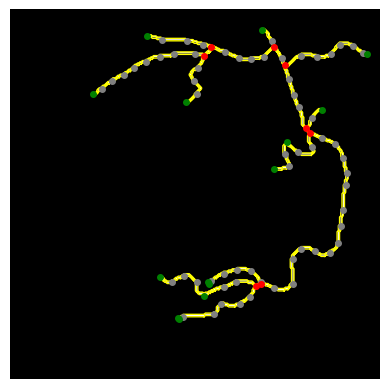

In [150]:
borders, bif, tri, inter, ari = get_nodes(skel)
draw_nodes(skel, [
    {'coords': inter, 'color': 'grey'},
    {'coords': borders, 'color': 'green'},
    {'coords': bif, 'color': 'red'},
    {'coords': tri, 'color': 'cyan'},
])
Json_one_Img(borders, bif, tri, inter, ari)

In [151]:
def JSON_complete_pipeline(borders, bif, tri, inter, ari, ruta):
    image = {}

    # Borrar JSON si ya existe
    if os.path.exists('data_complete_Pipeline.json'):
                os.remove('data_complete_Pipeline.json')


    # Guardar datos en JSON 
    for name in os.listdir(ruta):
        if '_gt.pgm' in name:
            nodes = {}

            image[name] = nodes

            nodes['externos'] = []
            nodes['bifurcaciones'] = []
            nodes['trifurcaciones'] = []
            nodes['internos'] = []
            nodes['aristas'] = []

            nodes['externos'].append(json.dumps(borders.tolist()))
            nodes['bifurcaciones'].append(json.dumps(bif.tolist()))
            nodes['trifurcaciones'].append(json.dumps(tri.tolist()))
            nodes['internos'].append(json.dumps(inter.tolist()))
            nodes['aristas'].append(json.dumps(ari.tolist()))

            with open('data_complete_Pipeline.json', 'w') as file:
                file.write(json.dumps(image, indent=4)) 
                file.write('\n')
                
    

In [152]:
def complete(path):
    imagenes = []  # Lista para almacenar las imágenes procesadas
    for name in os.listdir(path):
        if '_gt.pgm' in name:
            img_path = os.path.join(path, name) 
            img = read_img(img_path)
            skel = create_skeleton(img)

            imagenes.append(skel)

    fig, axes = plt.subplots(1, 2, figsize=(8, 8), sharex=True, sharey=True)
    ax = axes.ravel()

    ax[0].imshow(img, cmap='gray')
    ax[0].set_title('original')
    ax[0].axis('off')

    ax[1].imshow(skel, cmap='gray')
    ax[1].set_title('Skeleton')
    ax[1].axis('off')
        
    for img in imagenes:  
        borders, bif, tri, inter, ari = get_nodes(img)

        draw_nodes(img, [
            {'coords': inter, 'color': 'grey'},
            {'coords': borders, 'color': 'green'},
            {'coords': bif, 'color': 'red'},
            {'coords': tri, 'color': 'cyan'},
        ])
        

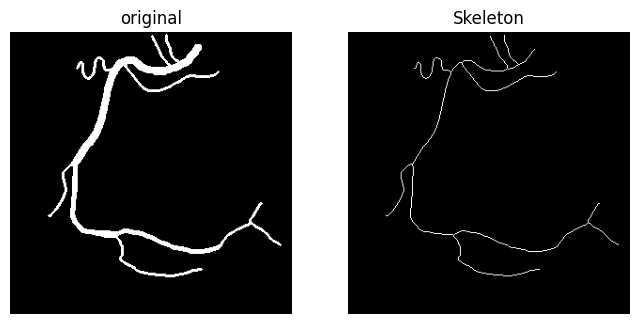

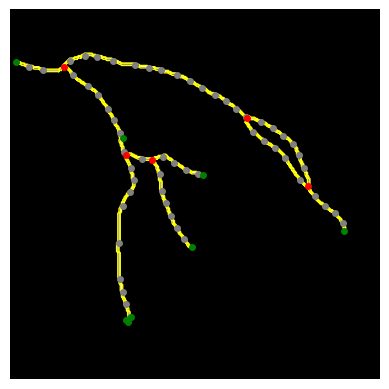

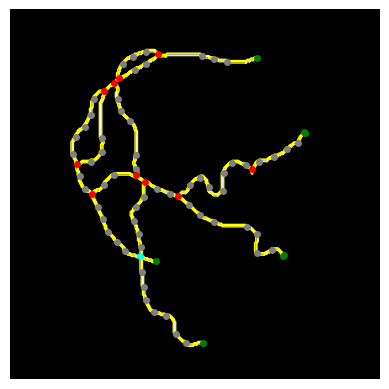

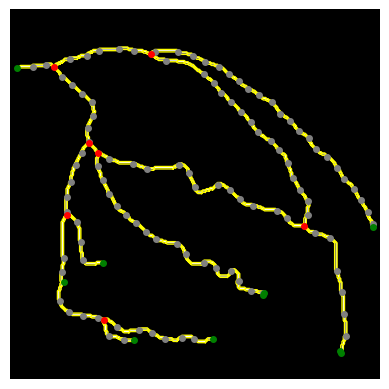

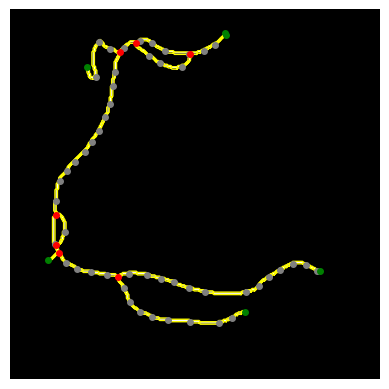

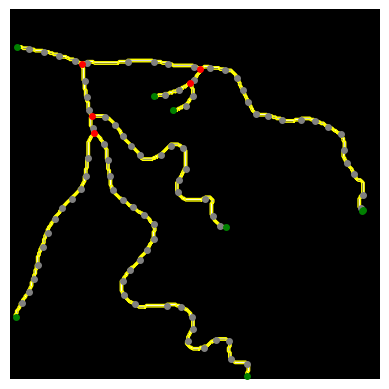

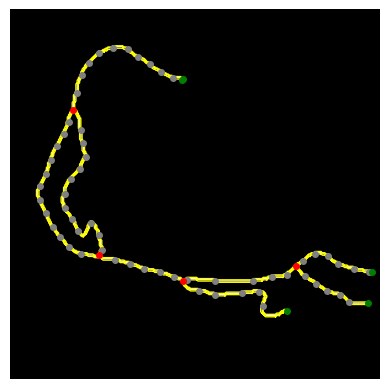

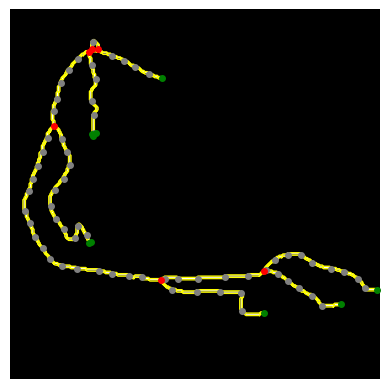

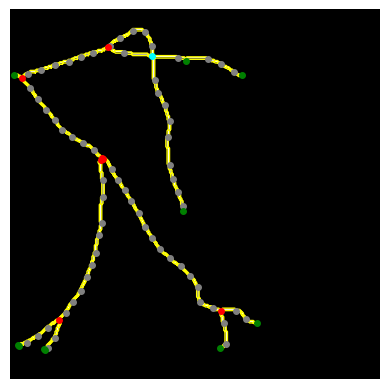

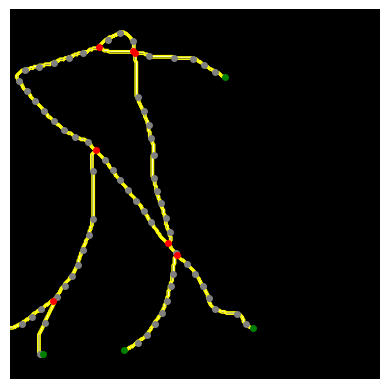

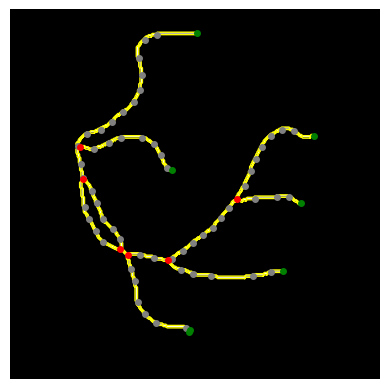

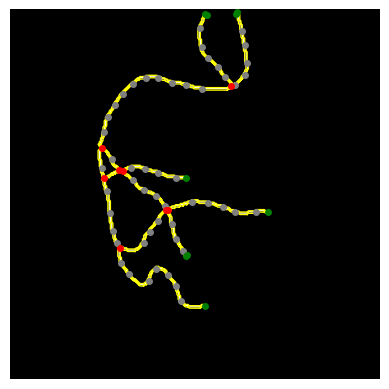

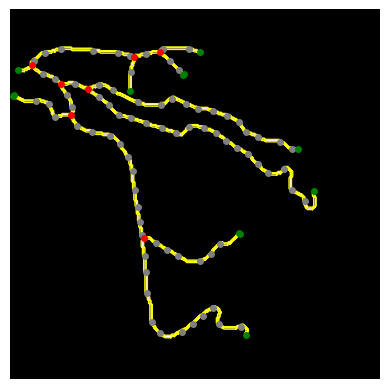

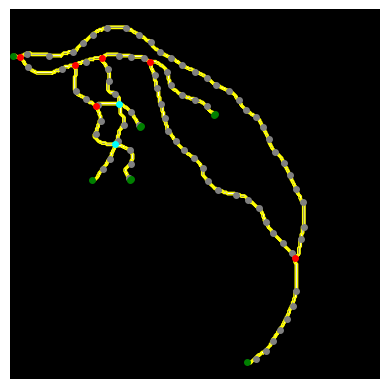

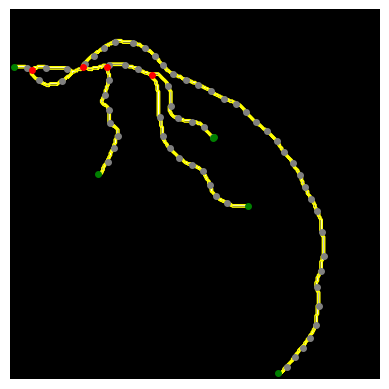

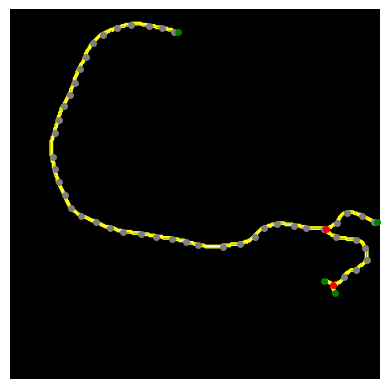

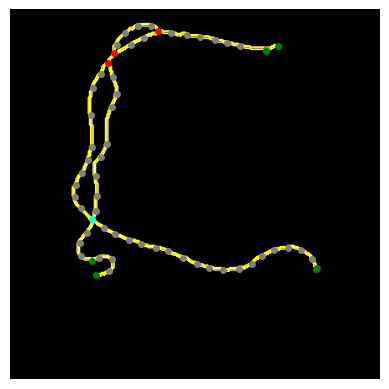

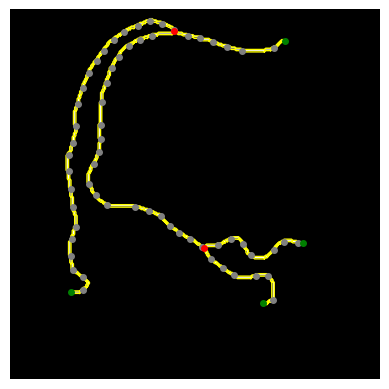

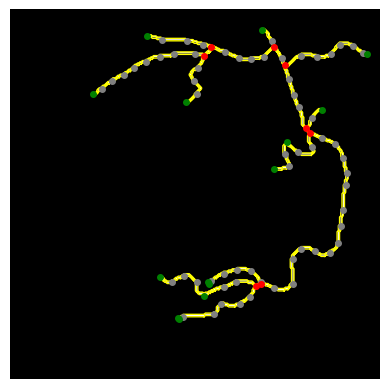

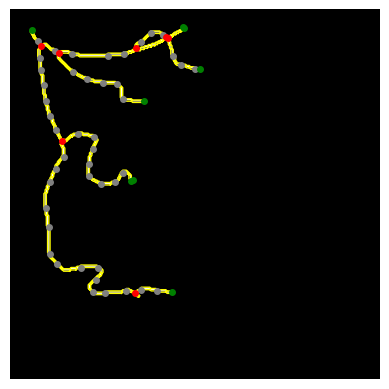

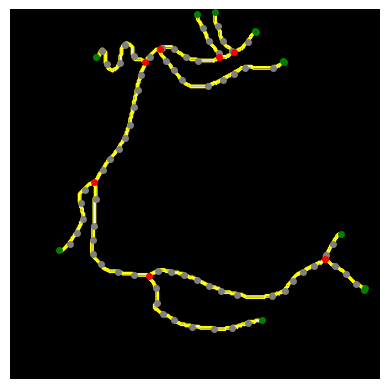

In [153]:
ruta = "./database"    
complete(ruta)
JSON_complete_pipeline(borders, bif, tri, inter, ari, ruta)